<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/choixActiviteLogiqueFloue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activités dans le flou avec skfuzzy

L'objectif est de pouvoir représenter des règles de type :
- si le temps est 'ensoleillé' et la température est 'temperée' et le vent est 'faible', alors l'activite est 'intense'
- si le temps est 'ensoleillé' et la température est 'chaude', alors l'activite est 'modérée'
- si le temps est 'nuageux' et la température est 'temperée' et le vent est 'moderé', alors l'activite est 'moderée'
- si le temps est 'pluvieux' et la température est 'froide' et le vent est 'fort', alors l'activite est 'faible'


Reprenez les exemples d'utilisation de la logique floue et adaptez les à ce problème

On utilise pour cela la librairie python skfuzzy
*(si elle n'est pas présente, installez là avec cette ligne : !pip install -U scikit-fuzzy)*

In [ ]:
 !pip install -U scikit-fuzzy

In [4]:
#les imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt

## les antécédents et les conséquents
- Les antécédents sont les variables utilisées pour prendre les décisions (ici le temps, la température et le vent)
    - le temps est codé sur 0,100 où les ensembles ensoleillé, nuageux, pluvieux sont définis  
    - la température est codée sur -10,45 pour les ensembles froide, tempérée, chaude  
    - le vent est codé sur 0,100 où les ensembles faible, modéré, fort sont définis  
- le conséquent est l'activité, codée sur 0,100 où les ensembles faible, modéré, intense sont définis  

In [3]:
temps = ctrl.Antecedent(np.arange(0,101,1), 'temps')
temperature = ctrl.Antecedent(np.arange(-10,50,5), 'temperature')
vent = ctrl.Antecedent(np.arange(0,101,1), 'vent')
activite = ctrl.Consequent(np.arange(0,101,1), 'activite')

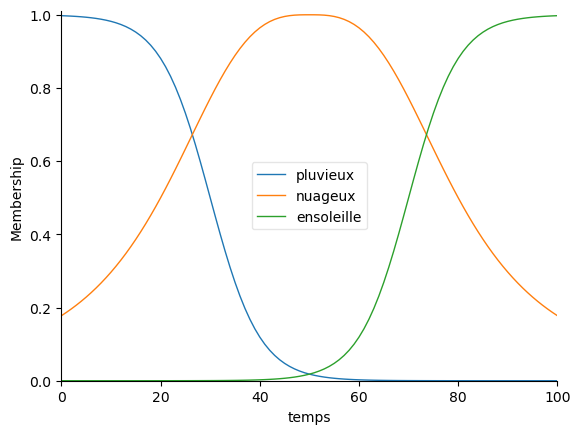

In [8]:
#ensembles pour le temps (l'ensolleillement, on suppose que l'on peut capter un degré de luminosite entre 0 et 100%)
#une courbe sigmoide, meteo moche aux températures froides, et est à moitié moche à 8°
temps_pluvieux = fuzz.sigmf(temps.universe, 30, -0.2)
#une courbe en cloche, météo commmence à être ressentie légèrement moyenne à 12°, parfaitement moyenne à 15° pour décroitre et ne l'être plus à 18°
temps_nuageux = fuzz.gbellmf(temps.universe, 30, 1.5, 50) #on dessine la moitié de la cloche, l'autre sera son miroir
#une courbe sigmoide, meteo belle aux températures chaude, et est à moitié belle à 20°
temps_ensoleille = fuzz.sigmf(temps.universe, 70, 0.2)
temps['pluvieux'] = temps_pluvieux
temps['nuageux'] = temps_nuageux
temps['ensoleille'] = temps_ensoleille
temps.view()